# CpE - 4102
# *Magboo, Paul Noriel V.*
# *Sanchez, Kylha A.*

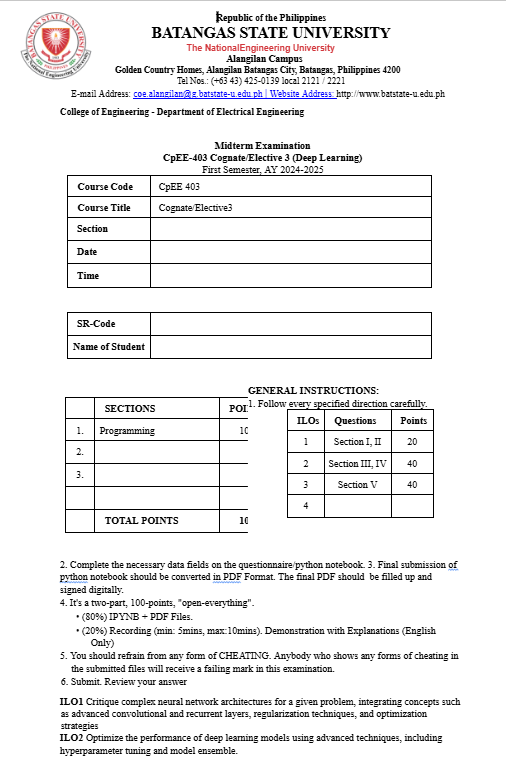

# Egg Color Classification

#  The egg-color image classification dataset contains images of three types of eggs: brown, violet, and white. Each image is labeled according to its color, which helps the model learn to distinguish between them based on visual features like color tones and texture.

#I. Data Collection

In [ ]:
!pip install opendatasets
!pip install split-folders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
import random

base_dir = '/content/drive/MyDrive/egg-color-classification_midterms_dataset'
output_dir = '/content/midterms-dataset-eggcolor'

classes = ['brown_egg', 'violet_egg', 'white_egg']

split_dirs = ['train', 'validation', 'test']
for split in split_dirs:
    for class_name in classes:
        os.makedirs(os.path.join(output_dir, split, class_name), exist_ok=True)

#II. Preparation & Data Preprocessing

In [ ]:
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Perform the split
for class_name in classes:
    class_path = os.path.join(base_dir, class_name)
    images = os.listdir(class_path)

    # Shuffle the images to ensure random selection
    random.shuffle(images)

    # Calculate the number of images for each split
    num_images = len(images)
    train_split = int(train_ratio * num_images)
    val_split = int(val_ratio * num_images)

    # Split the images into train, validation, and test
    train_images = images[:train_split]
    val_images = images[train_split:train_split + val_split]
    test_images = images[train_split + val_split:]

    # Move images to their respective directories
    for img in train_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(output_dir, 'train', class_name, img)
        shutil.copy(src, dst)

    for img in val_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(output_dir, 'validation', class_name, img)
        shutil.copy(src, dst)

    for img in test_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(output_dir, 'test', class_name, img)
        shutil.copy(src, dst)

print("Dataset split complete!")

Dataset split complete!


#III. CNN Model(AlexNet)

In [ ]:
# AlexNet model
def build_alexnet(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), input_shape=input_shape, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Initialize and compile model
input_shape = (180, 180, 3)
num_classes = train_generator.num_classes
model = build_alexnet(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# IV. Compile and Train the Model

# 1. Training Code

In [ ]:
import os
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Directories
base_dir = '/content/midterms-dataset-eggcolor'
train_dir_aug = os.path.join(base_dir, '/content/midterms-dataset-eggcolor/train')
val_dir_aug = os.path.join(base_dir, '/content/midterms-dataset-eggcolor/validation')
test_dir_aug = os.path.join(base_dir, '/content/midterms-dataset-eggcolor/test')

In [ ]:
# Image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir_aug,
    target_size=(180, 180),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir_aug,
    target_size=(180, 180),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir_aug,
    target_size=(180, 180),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 602 images belonging to 3 classes.
Found 170 images belonging to 3 classes.
Found 89 images belonging to 3 classes.


# 2. Training Results

In [ ]:
# Train model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    verbose=1
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 114s 10s/step - accuracy: 0.8263 - loss: 0.4456 - val_accuracy: 0.8706 - val_loss: 0.3533
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 140s 10s/step - accuracy: 0.8491 - loss: 0.3990 - val_accuracy: 0.7588 - val_loss: 0.6431
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 119s 11s/step - accuracy: 0.8409 - loss: 0.4579 - val_accuracy: 0.8588 - val_loss: 0.3553
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 110s 10s/step - accuracy: 0.9202 - loss: 0.2312 - val_accuracy: 0.9706 - val_loss: 0.1703
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 143s 10s/step - accuracy: 0.9304 - loss: 0.1785 - val_accuracy: 0.9529 - val_loss: 0.2109
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 142s 10s/step - accuracy: 0.9557 - loss: 0.1289 - val_accuracy: 0.9647 - val_loss: 0.2015
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 142s 10s/step - accuracy: 0.9640 - loss: 0.1019 - val_accuracy: 0.9824 - val_loss: 0.1493
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 109s 9s/step - accuracy: 0.9732 - loss: 0.0814 - val_accuracy: 0.9

#V. Evaluation

# 1. Evaluation Code

In [ ]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_class = np.argmax(y_pred, axis=1)

precision = precision_score(y_true, y_pred_class, average='weighted')
recall = recall_score(y_true, y_pred_class, average='weighted')
f1 = f1_score(y_true, y_pred_class, average='weighted')

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


# 2. Evaluation Results

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 45, 45, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 23, 23, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │          12,291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,880,907 (667.12 MB)

 Trainable params: 58,293,635 (222.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 116,587,272 (444.75 MB)

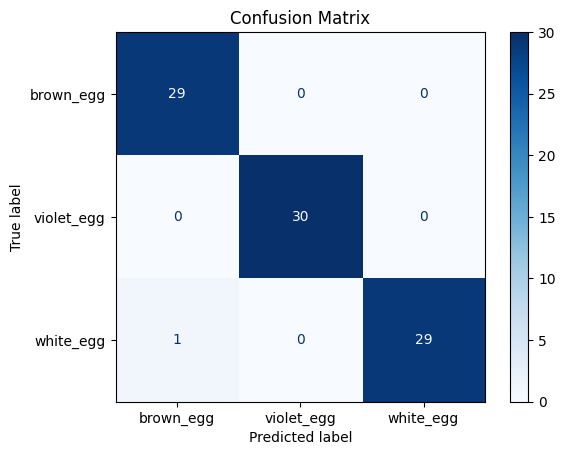

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_class)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# 3. Model Performance

In [ ]:
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Test Accuracy: 0.9888
Precision: 0.9891
Recall: 0.9888
F1-score: 0.9888


# 4. Visualization of Training Results

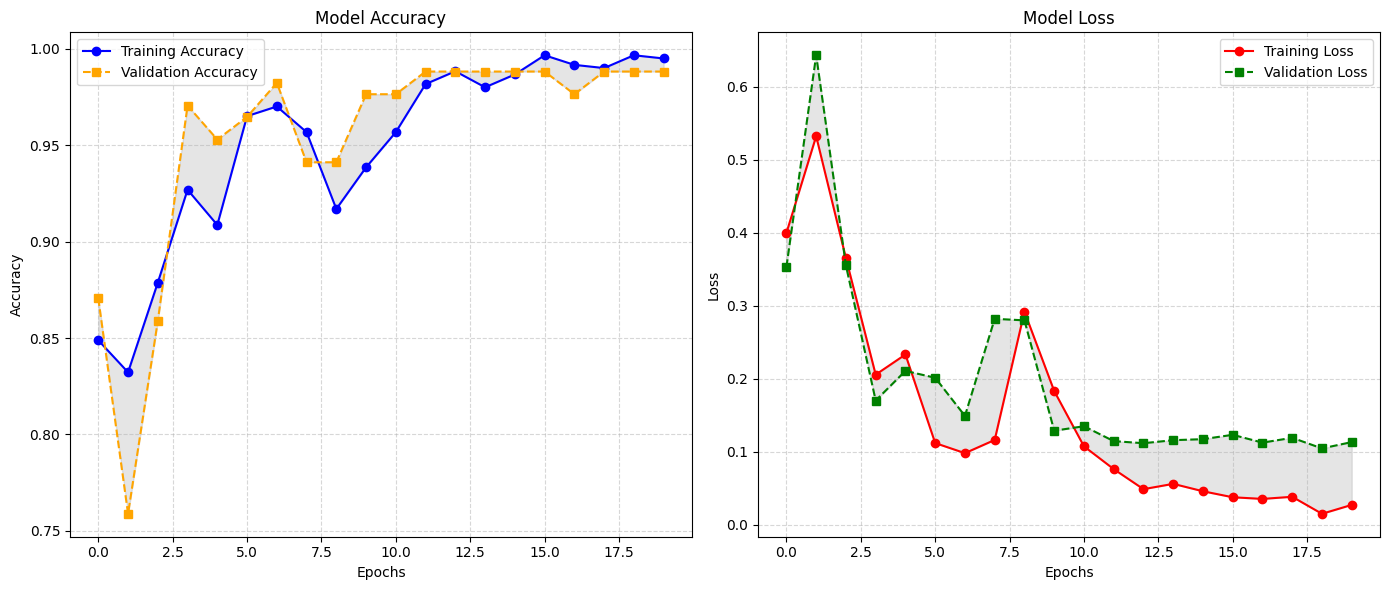

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--', marker='s')
plt.fill_between(range(len(history.history['accuracy'])),
                 history.history['accuracy'],
                 history.history['val_accuracy'],
                 color='gray', alpha=0.2)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='r', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green', linestyle='--', marker='s')
plt.fill_between(range(len(history.history['loss'])),
                 history.history['loss'],
                 history.history['val_loss'],
                 color='gray', alpha=0.2)
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


#5. Testing the Model

# I. White Egg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


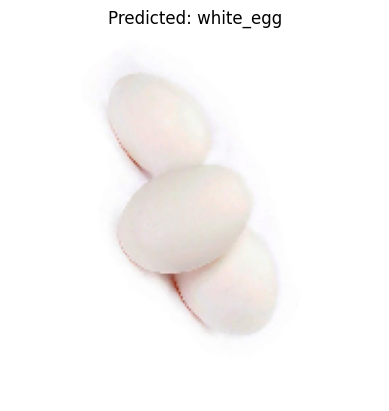

Predicted Label: white_egg


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_single_image(model, image_path, class_indices):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(180, 180))  # Resize to match the model's expected input
    img_array = img_to_array(img) / 255.0               # Normalize image to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)       # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse mapping from indices to labels
    predicted_label = class_labels[predicted_class]

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Label: {predicted_label}")

# Test the function with a sample image from the test directory
test_image_path = '/content/midterms-dataset-eggcolor/test/white_egg/aug_0_2190.jpeg'  # Replace with an actual path
predict_single_image(model, test_image_path, test_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


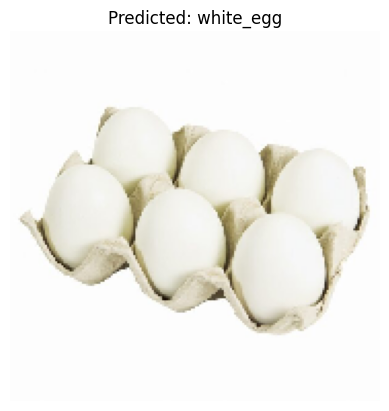

Predicted Label: white_egg


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_single_image(model, image_path, class_indices):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(180, 180))  # Resize to match the model's expected input
    img_array = img_to_array(img) / 255.0               # Normalize image to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)       # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse mapping from indices to labels
    predicted_label = class_labels[predicted_class]

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Label: {predicted_label}")

# Test the function with a sample image from the test directory
test_image_path = '/content/test_white egg.jpg'  # Replace with an actual path
predict_single_image(model, test_image_path, test_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


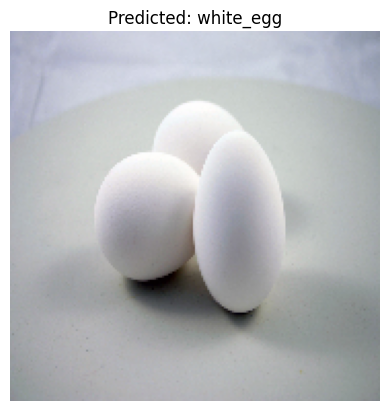

Predicted Label: white_egg


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_single_image(model, image_path, class_indices):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(180, 180))  # Resize to match the model's expected input
    img_array = img_to_array(img) / 255.0               # Normalize image to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)       # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse mapping from indices to labels
    predicted_label = class_labels[predicted_class]

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Label: {predicted_label}")

# Test the function with a sample image from the test directory
test_image_path = '/content/test_white egg 1.jpg'  # Replace with an actual path
predict_single_image(model, test_image_path, test_generator.class_indices)


# II. Brown Egg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


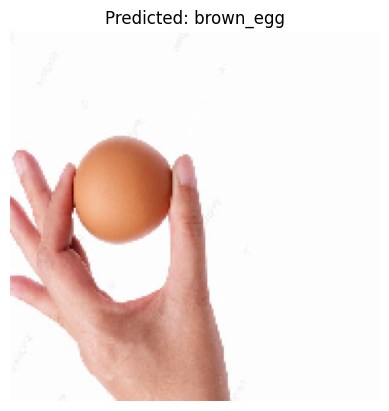

Predicted Label: brown_egg


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_single_image(model, image_path, class_indices):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(180, 180))  # Resize to match the model's expected input
    img_array = img_to_array(img) / 255.0               # Normalize image to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)       # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse mapping from indices to labels
    predicted_label = class_labels[predicted_class]

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Label: {predicted_label}")

# Test the function with a sample image from the test directory
test_image_path = '/content/midterms-dataset-eggcolor/test/brown_egg/aug_0_6394.jpeg'  # Replace with an actual path
predict_single_image(model, test_image_path, test_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


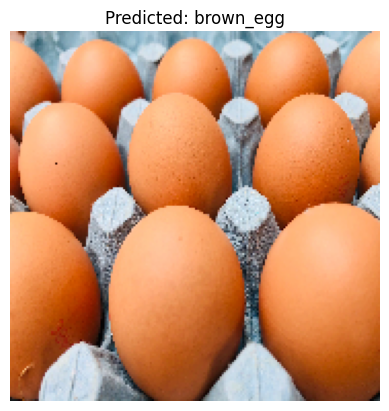

Predicted Label: brown_egg


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_single_image(model, image_path, class_indices):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(180, 180))  # Resize to match the model's expected input
    img_array = img_to_array(img) / 255.0               # Normalize image to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)       # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse mapping from indices to labels
    predicted_label = class_labels[predicted_class]

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Label: {predicted_label}")

# Test the function with a sample image from the test directory
test_image_path = '/content/try_brown_egg.webp'  # Replace with an actual path
predict_single_image(model, test_image_path, test_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


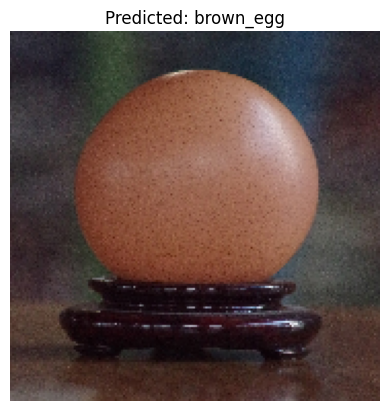

Predicted Label: brown_egg


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_single_image(model, image_path, class_indices):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(180, 180))  # Resize to match the model's expected input
    img_array = img_to_array(img) / 255.0               # Normalize image to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)       # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse mapping from indices to labels
    predicted_label = class_labels[predicted_class]

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Label: {predicted_label}")

# Test the function with a sample image from the test directory
test_image_path = '/content/test_brown egg 2.jpg'  # Replace with an actual path
predict_single_image(model, test_image_path, test_generator.class_indices)


# III. Violet Egg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


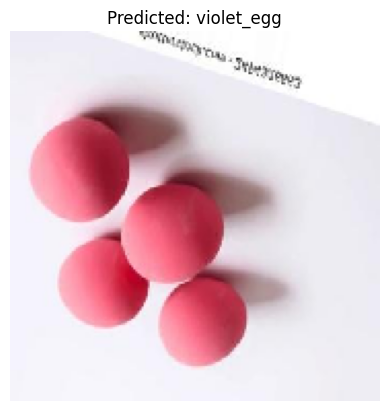

Predicted Label: violet_egg


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_single_image(model, image_path, class_indices):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(180, 180))  # Resize to match the model's expected input
    img_array = img_to_array(img) / 255.0               # Normalize image to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)       # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse mapping from indices to labels
    predicted_label = class_labels[predicted_class]

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Label: {predicted_label}")

# Test the function with a sample image from the test directory
test_image_path = '/content/midterms-dataset-eggcolor/test/violet_egg/aug_0_2100.jpeg'  # Replace with an actual path
predict_single_image(model, test_image_path, test_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


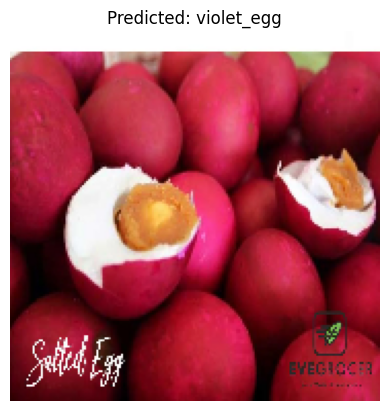

Predicted Label: violet_egg


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_single_image(model, image_path, class_indices):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(180, 180))  # Resize to match the model's expected input
    img_array = img_to_array(img) / 255.0               # Normalize image to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)       # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse mapping from indices to labels
    predicted_label = class_labels[predicted_class]

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Label: {predicted_label}")

# Test the function with a sample image from the test directory
test_image_path = '/content/test_violet egg.webp'  # Replace with an actual path
predict_single_image(model, test_image_path, test_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


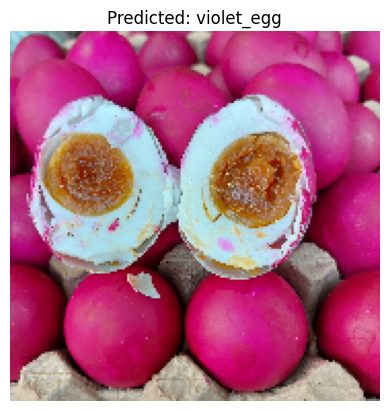

Predicted Label: violet_egg


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_single_image(model, image_path, class_indices):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(180, 180))  # Resize to match the model's expected input
    img_array = img_to_array(img) / 255.0               # Normalize image to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)       # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse mapping from indices to labels
    predicted_label = class_labels[predicted_class]

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Label: {predicted_label}")

# Test the function with a sample image from the test directory
test_image_path = '/content/test_salted egg 3.webp'  # Replace with an actual path
predict_single_image(model, test_image_path, test_generator.class_indices)
